# Heart

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install Jinja2

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel(r"D:\certisured ML\Machine Learning\multilinear regression\Heartattack_prediction_data.xlsx")

In [5]:
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [7]:
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(68)

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(3949, 14)

<pre><code>def discretise(List, Step):
    D_List = []
    MIN = min(List)
    MAX = max(List)
    NumOfStates = (MAX-MIN)/Step
    
    for items in List:
        D_List.append(int(items/Step))
        
    #if(NumOfStates == max(D_List)):
    return D_List

#Example:
discretise(column_name, step)

print(discretise(df['Age'], 10))
df['Age']= discretise(df['Age'], 10)</code></pre>

In [12]:
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Sex,3949.000000,0.436313,0.495990,0.000000,0.000000,0.000000,1.000000,1.000000
Age,3949.000000,49.549253,8.561709,32.000000,42.000000,49.000000,56.000000,70.000000
Heart Rate,3949.000000,75.794125,12.017503,44.000000,68.000000,75.000000,83.000000,143.000000
Glucose,3949.000000,82.040010,23.496781,40.000000,72.000000,78.000000,87.000000,394.000000
BMI,3949.000000,25.797371,4.067156,15.540000,23.080000,25.380000,28.040000,56.800000
Smoker,3949.000000,0.489997,0.499963,0.000000,0.000000,0.000000,1.000000,1.000000
Ciggarates(Per Day),3949.000000,9.031907,11.962920,0.000000,0.000000,0.000000,20.000000,70.000000
Hypertension,3949.000000,0.309952,0.462532,0.000000,0.000000,0.000000,1.000000,1.000000
Systolic BP,3949.000000,132.273614,21.939643,83.500000,117.000000,128.000000,143.500000,295.000000
Diastolic BP,3949.000000,82.869840,11.881098,48.000000,75.000000,82.000000,89.500000,142.500000


Sex


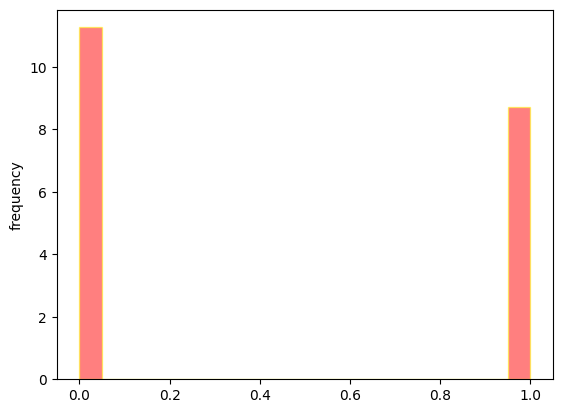

Age


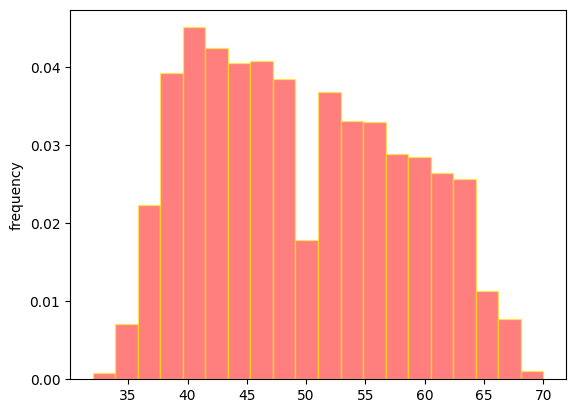

Heart Rate


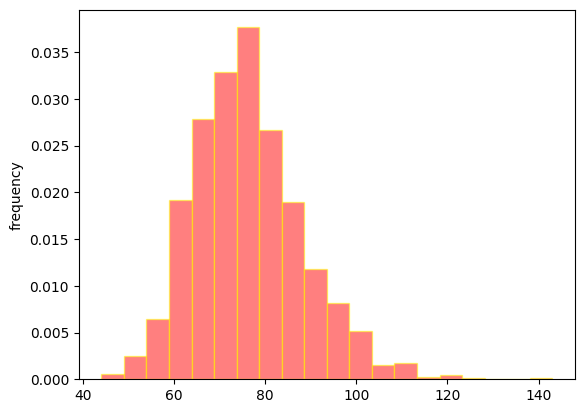

Glucose


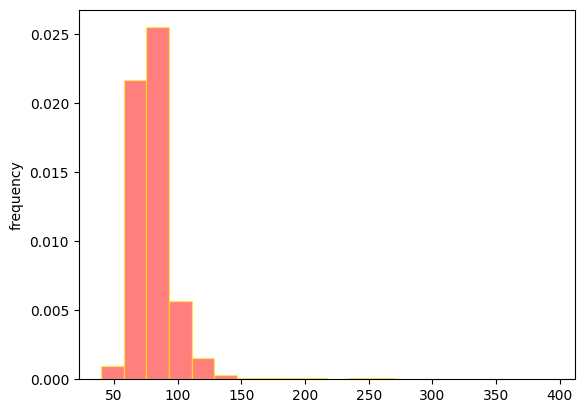

BMI


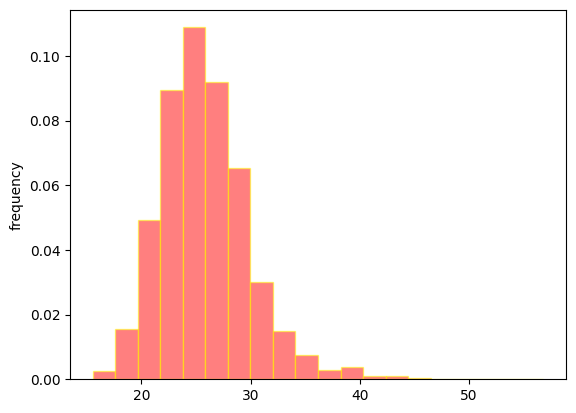

Smoker


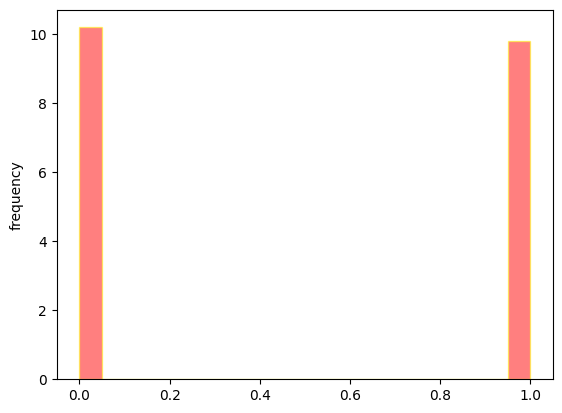

Ciggarates(Per Day)


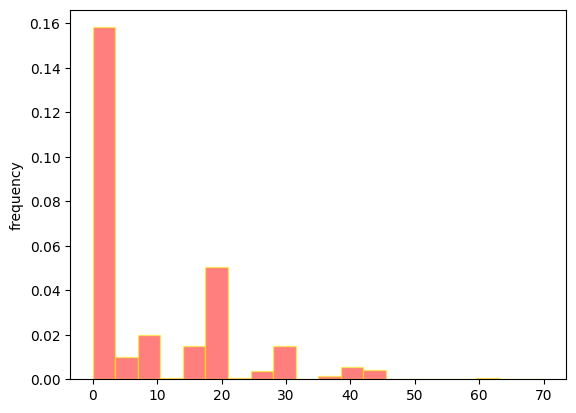

Hypertension


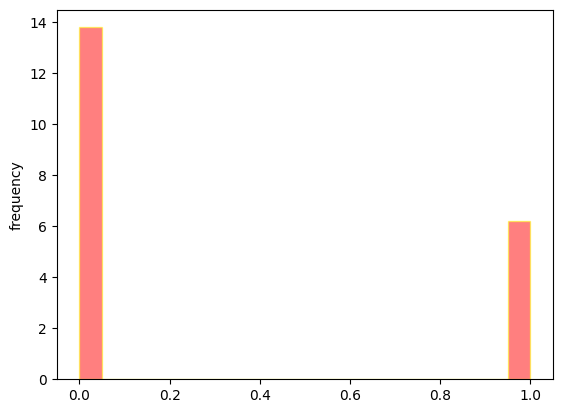

Systolic  BP


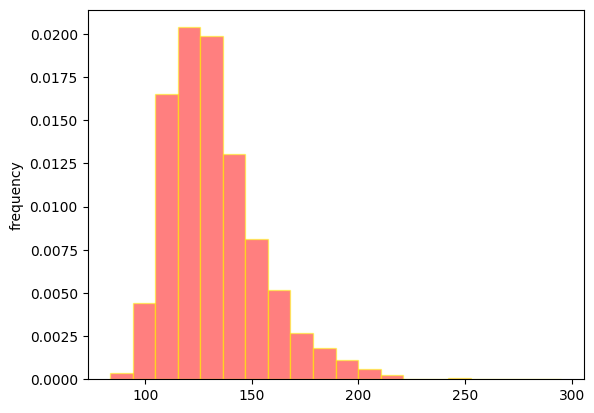

Diastolic BP


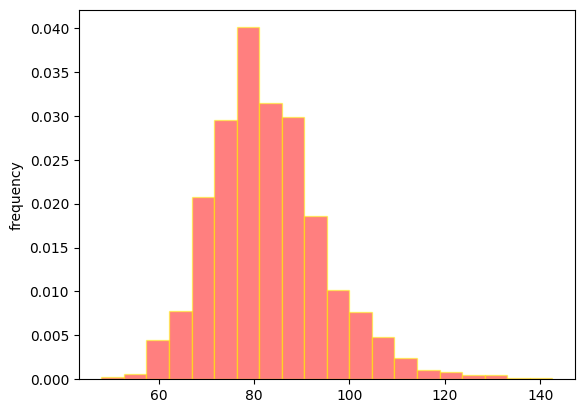

ON BP Medication


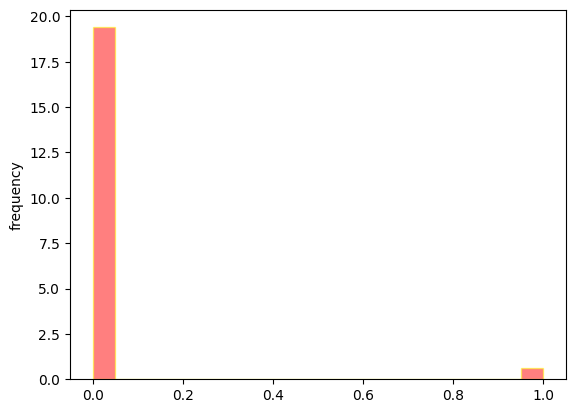

Previous Stroke


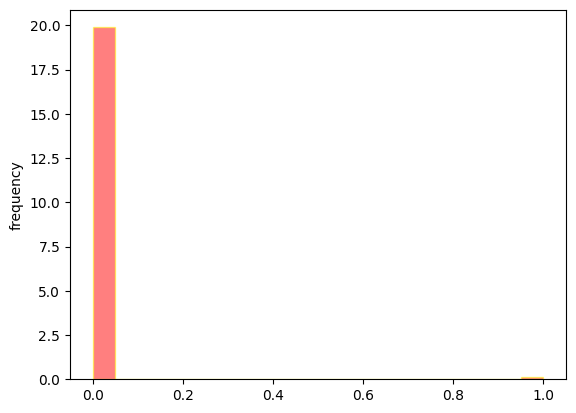

Diabetic


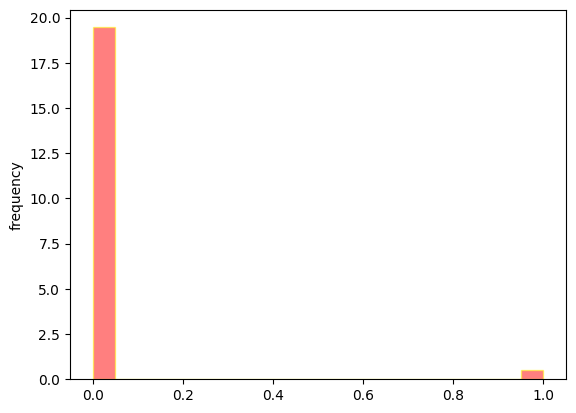

RiskOfCHD


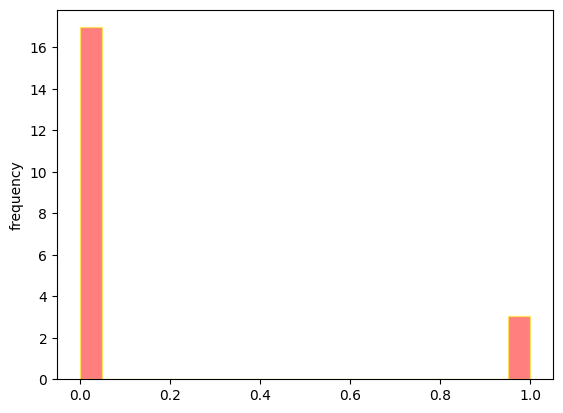

In [13]:
# Univeriate analysis
for col in df.columns:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind = 'hist', alpha=0.5, bins=20, color='r',edgecolor='yellow',density='kde') 
    plt.ylabel('frequency')
    plt.show()

In [14]:
df.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

In [15]:
features = list(df.columns[:13])
features

['Sex',
 'Age',
 'Heart Rate',
 'Glucose',
 'BMI',
 'Smoker',
 'Ciggarates(Per Day)',
 'Hypertension',
 'Systolic  BP',
 'Diastolic BP',
 'ON BP Medication',
 'Previous Stroke',
 'Diabetic']

In [16]:
X = df[['Sex', 'Age', 'Heart Rate', 'Smoker', 'Hypertension', 'Systolic  BP', 'Diastolic BP']]
y = df["RiskOfCHD"]

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Fit the decision tree model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [19]:
feature = df[['Sex', 'Age', 'Heart Rate', 'Smoker', 'Hypertension', 'Systolic  BP', 'Diastolic BP']]
y = df["RiskOfCHD"]

In [20]:
import math

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))

# Function to calculate conditional entropy
def conditional_entropy(data, feature, target):
    feature_values = data[feature].unique()  # Corrected: use .unique() on the series
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy


# Calculate information gain for each feature

for feature in features:
    ig = information_gain(df,feature,'RiskOfCHD')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Sex: 0.006631933417966862
Information Gain for Age: 0.0422524322368345
Information Gain for Heart Rate: 0.013790087396667428
Information Gain for Glucose: 0.04161416939385465
Information Gain for BMI: 0.25335982980047883
Information Gain for Smoker: 0.00044004241884787465
Information Gain for Ciggarates(Per Day): 0.00727441275411278
Information Gain for Hypertension: 0.020625371664296344
Information Gain for Systolic  BP: 0.08124125071563493
Information Gain for Diastolic BP: 0.04730874057364798
Information Gain for ON BP Medication: 0.004342895811076941
Information Gain for Previous Stroke: 0.0010929406459186941
Information Gain for Diabetic: 0.004853281987031943


In [21]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Export the tree to DOT format
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           rounded=True, proportion=False,
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
X_test

,Sex,Age,Heart Rate,Smoker,Hypertension,Systolic BP,Diastolic BP
3393,1,62,72.0,0,0,130.0,87.0
2338,0,39,67.0,0,0,121.0,78.5
1977,0,64,85.0,0,0,108.0,82.0
71,1,42,63.0,1,0,116.0,72.5
2844,1,42,66.0,1,0,114.5,76.0
...,...,...,...,...,...,...,...
2298,1,60,67.0,1,1,149.0,95.0
1912,0,47,75.0,0,0,118.0,84.0
784,0,43,70.0,1,0,137.0,81.0
3544,1,57,60.0,0,0,130.0,74.0


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 76.0759493670886
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       677
           1       0.22      0.26      0.23       113

    accuracy                           0.76       790
   macro avg       0.54      0.55      0.55       790
weighted avg       0.78      0.76      0.77       790

Confusion Matrix:
 [[572 105]
 [ 84  29]]


In [ ]:
X

,Sex,Age,Heart Rate,Smoker,Hypertension,Systolic BP,Diastolic BP
0,1,39,80.0,0,0,106.0,70.0
1,0,46,95.0,0,0,121.0,81.0
2,1,48,75.0,1,0,127.5,80.0
3,0,61,65.0,1,1,150.0,95.0
4,0,46,85.0,1,0,130.0,84.0
...,...,...,...,...,...,...,...
4239,0,39,85.0,1,0,133.0,86.0
4277,0,39,85.0,1,0,114.0,64.0
4284,0,43,70.0,0,0,123.5,77.5
4289,0,60,65.0,0,0,110.0,72.5


In [ ]:
new = [[1, 40, 80, 1, 1, 110, 72]]
y_pred = model.predict(new)
print(y_pred[0])

0
